In [1]:
from IGRApy import IGRA #import IGRA

# READING STATIONWISE DATA USING IGRA

In [8]:
#These datasets are available via https://www.ncei.noaa.gov/pub/data/igra/monthly/monthly-por/
#The station lists are available in https://www1.ncdc.noaa.gov/pub/data/igra/igra2-station-list.txt.
temp = IGRA.igra('/home/user/Desktop/IGRA/temp_00z-mly.txt',stat=['INM00043371'], save=None) #temperature 
vapr = IGRA.igra('/home/user/Desktop/IGRA/vapr_00z-mly.txt',stat=['INM00043371'], save=None) #vapour pressure

#if u want to save the station data

temp = IGRA.igra('/home/user/Desktop/IGRA/temp_00z-mly.txt',stat=['INM00043371'], 
                 save=True, save_dir='/home/user/Desktop/') #Data will be saved as INM00043371.nc to Desktop in my  case

In [9]:
temp # temp data will be stored to this variable

<xarray.DataArray (time: 890, lev: 12)>
array([[  nan,   nan,   nan, ...,   nan,  257.,  257.],
       [  nan,   nan,   nan, ...,   nan,  258.,  258.],
       [  nan,   nan,   nan, ...,   nan,  250.,  248.],
       ...,
       [-794., -674., -536., ...,  221.,  263.,  260.],
       [-802., -673., -530., ...,  228.,  256.,  254.],
       [-815., -669., -518., ...,  223.,  250.,  253.]])
Coordinates:
  * time     (time) datetime64[ns] 1948-04-01 1948-05-01 ... 2022-05-01
  * lev      (lev) int64 100 150 200 250 300 400 500 700 850 925 1000 9999

# SIMPLE GRAPHICAL REPRESENTATION OF EACH STATION

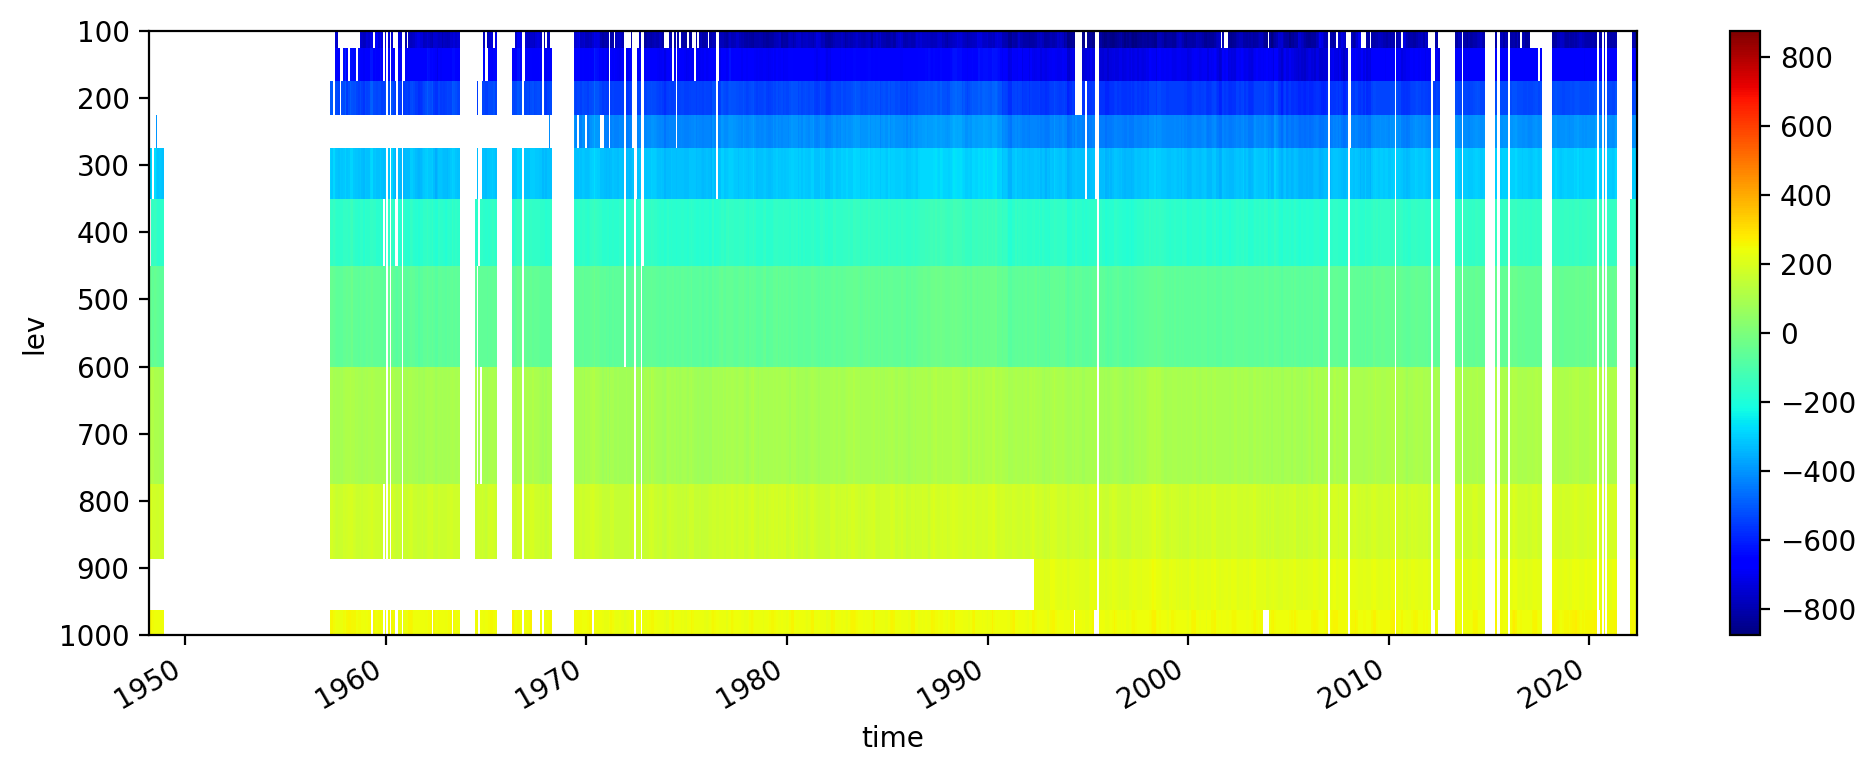

In [10]:
IGRA.plot_fig(temp)

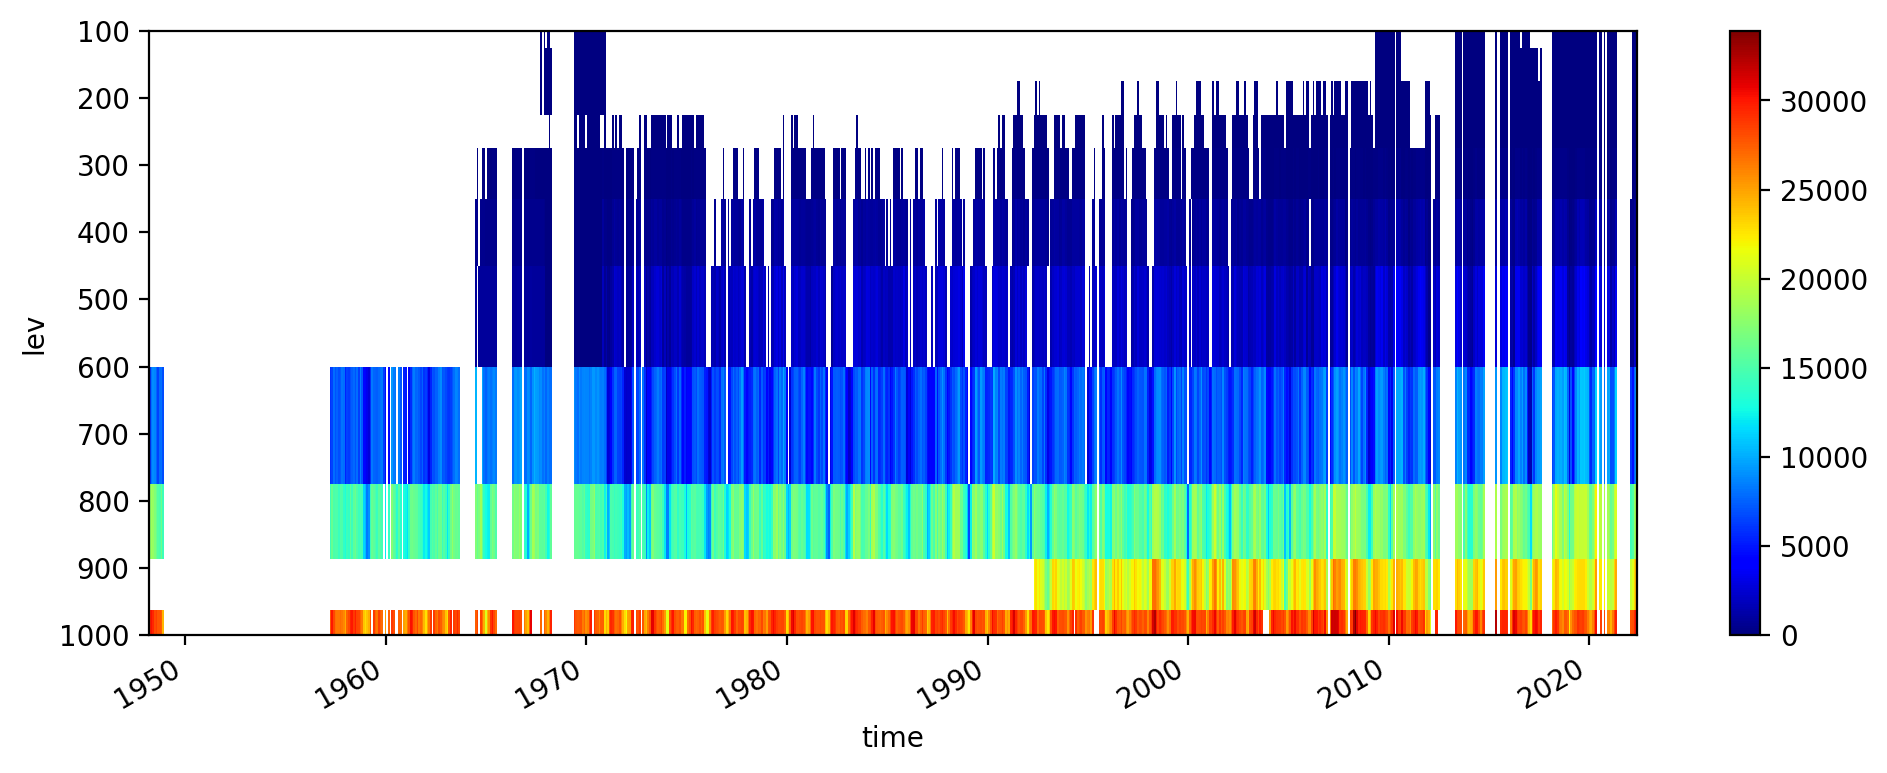

In [11]:
IGRA.plot_fig(vapr)

# CALCULATION Relative Humidity (RH) and Specific Humidity (SH) from Temperature and vapour pressure data from IGRA V2

In [6]:
temp = IGRA.igra('/home/user/Desktop/IGRA/temp_00z-mly.txt',stat=['INM00043371'], save=None) #temperature 
vapr = IGRA.igra('/home/user/Desktop/IGRA/vapr_00z-mly.txt',stat=['INM00043371'], save=None) #vapour pressure

RH = IGRA.RH(temp, vapr)
SH = IGRA.SH(vapr)

(1000.0, 10.0)

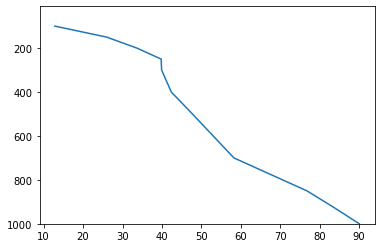

In [5]:
#illlustration of Data
import matplotlib.pyplot as plt
RH1 = RH.mean(dim='time')
plt.plot(RH1[0:-1], RH.lev[0:-1])
plt.ylim(1000,10)

(1000.0, 10.0)

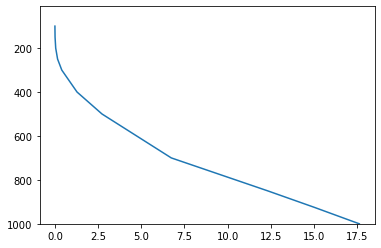

In [7]:
#illustration of Specific humidity
s1 = SH.sel(time=slice('2003','2020')).mean(dim='time')
plt.plot(s1[0:-1], s1.lev[0:-1])
plt.ylim(1000,10)